<head>
  <h2><span style='language:EN-GB'>Scale-invariant blob detection</span></h2>
  <h3><span style='font-size:16.0pt;language:EN-GB'>Jean Ponce, Cordelia Schmid and Josef Sivic</span></h3>
  <h3><span style='font-size:16.0pt;language:EN-GB'>(adapted from Svetlana Lazebnik, UNC)</span></h3>
  <p class=MsoNormal style='margin-bottom:14.0pt'><span style='language:EN-GB'>The goal of the assignment is to implement a Laplacian blob detector as discussed in the lectures.</span></p>
  <h3><span style='font-size:16.0pt;language:EN-GB'>Algorithm outline:</span></h3>
  <p class=MsoNormal><span style='language:EN-GB'>1. Generate a Laplacian of Gaussian filter.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'>2. Build a Laplacian scale space, starting with some initial scale and going for n iterations: </span></p>
  <p class=MsoNormal style='margin-left:28.25pt'><span style='language:EN-GB'>1. Filter image with scale-normalized Laplacian at current scale.</span></p>
  <p class=MsoNormal style='margin-left:28.25pt'><span style='language:EN-GB'>2. Save square of Laplacian response for current level of scale space.</span></p>
  <p class=MsoNormal style='margin-left:28.25pt'><span style='language:EN-GB'>3. Increase scale by a factor k.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'><span dir=ltr></span>3. Perform non-maximum suppression in scale space. </span><span
  style='font-weight:bold;language:EN-GB'>(See the note below)</span><span
  style='language:EN-GB'>.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'>4. Display resulting circles at their characteristic scales.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <h3><span style='language:EN-GB'>Tips</span></h3>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>It is relatively inefficient to repeatedly filter the image with a kernel of increasing size. Instead of increasing the kernel size by a factor of k, try downsampling the image by a factor 1/k (of course, then you will have to upsample the result or do some interpolation in order to find maxima in scale space). Alternatively, implement the difference-of-Gaussian pyramid as described in section 3 of </span><span
  style='language:EN-GB'><a href="http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf">David Lowe's paper</a></span><span
  style='language:EN-GB'> (see below). Remember that </span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='color:#FF6600;font-weight:bold;language:EN-GB'>NEW:</span><span
  style='font-weight:bold;language:EN-GB'> On the non-maximum suppression in scale space.  </span><span
  style='language:EN-GB'>The goal is to find pixels which are local maxima in the scale-space. This amounts to finding pixels with the filter response (strictly) greater than its 26 scale-space neighbours, considering also the adjacent scales as illustrated in figure 2 of </span><span
  style='language:EN-GB'><a href="http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf">David Lowe's paper</a></span><span
  style='language:EN-GB'>. When the scale-space is obtained by filtering the image with a kernel of increasing size, as described in the algorithm outline above, all levels of the scale-space have the same image size and you only need to check the 3x3 spatial neighbourhood at the same pixel location in the adjacent levels.  When the scale-space is obtained by image down-sampling while keeping the filter size constant, you need to locate the correct position of the spatial neighbours in the adjacent levels. This can be achieved by up-sampling / down-sampling the adjacent levels to the same size as the current level of the pyramid, effectively doing interpolation. Alternatively, you can just consider the nearest 3x3 spatial neighbourhood in the adjacent levels. This avoids the (potentially expensive) interpolation, but is only an approximation. </span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>You have to choose the initial scale, the factor k by which the scale is multiplied each time, and the number of levels in the scale space. Reasonable value for the initial scale is 2, using 10 to 15 levels for the scale pyramid. The multiplication factor should depend on the largest scale at which you want regions to be detected (or, if you are implementing the difference-of-Gaussian scale space, this factor depends on computational efficiency considerations as described in David Lowe's paper).</span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>You may want to use a three-dimensional array to represent your scale space. It would be declared as follows:</span></p>
  <p class=MsoNormal style='margin-left:18.0pt'><span style='font-family:"Courier New";
  language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='margin-left:56.5pt'><span style='font-family:"Courier New";
  language:EN-GB'>scale_space = zeros(h,w,n); % [h,w] - dimensions of image, n - number of levels in scale space</span></p>
  <p class=MsoNormal style='margin-left:18.0pt'><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='margin-left:18.0pt'><span style='language:EN-GB'>Then </span><span
  style='font-family:"Courier New";language:EN-GB'>scale_space(:,:,i)</span><span
  style='language:EN-GB'> would give you the i-th level of the scale space. Alternatively, if you are storing different levels of the scale pyramid at different resolutions, you may want to use a cell array, where each &quot;slot&quot; can accommodate a different data type or a matrix of different dimensions. Here is how you would use it:</span></p>
  <p class=MsoNormal style='margin-left:18.0pt'><span style='font-family:"Courier New";
  language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='margin-left:56.5pt'><span style='font-family:"Courier New";
  language:EN-GB'>scale_space    = cell(n,1); %creates a cell array with n &quot;slots&quot; </span></p>
  <p class=MsoNormal style='margin-left:56.5pt'><span style='font-family:"Courier New";
  language:EN-GB'>scale_space{i} = my_matrix; % store a matrix at level i</span></p>
  <p class=MsoNormal style='margin-left:-18.0pt'><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>To perform nonmaximum suppression in scale space, you may first want to do nonmaximum suppression in each 2D slice separately. For this, you may find functions </span><span
  style='font-family:"Courier New";language:EN-GB'>nlfilter</span><span
  style='language:EN-GB'>, </span><span style='font-family:"Courier New";
  language:EN-GB'>colfilt</span><span style='language:EN-GB'> or </span><span
  style='font-family:"Courier New";language:EN-GB'>ordfilt2</span><span
  style='language:EN-GB'> useful. To extract the final nonzero values (corresponding to detected regions), you may want to use the </span><span
  style='font-family:"Courier New";language:EN-GB'>find</span><span
  style='language:EN-GB'> function.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>You also have to set a threshold on the squared Laplacian response above which to report region detections. A reasonable value is 0.001, but you should play around with different values and choose one you like best.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>To display the detected regions as circles, you can use </span><span
  style='language:EN-GB'><a href="show_all_circles.m">this function</a></span><span
  style='language:EN-GB'> (or feel free to write your own). Don't forget that there is a multiplication factor that relates the scale at which a region is detected to the radius of the circle that most closely &quot;approximates&quot; the region.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>If you decide to experiment with different implementation choices for building the scale space and nonmaximum suppression, you may want to compare these choices according to their computational efficiency. To time different routines, use </span><span
  style='font-family:"Courier New";language:EN-GB'>tic</span><span
  style='language:EN-GB'> and </span><span style='font-family:"Courier New";
  language:EN-GB'>toc</span><span style='language:EN-GB'> commands.</span></p>
  <p class=MsoNormal><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>Apply the detector to greyscale versions of colour images. In Matlab, you can convert a color image to greyscale using </span></p>
  <p class=MsoNormal style='margin-left:56.5pt'><span style='font-family:"Courier New";
  language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='margin-left:56.5pt'><span style='font-family:"Courier New";
  language:EN-GB'>Im_gray = mean(Im_rgb,3);</span></p>
  <h3><span style='font-size:12.0pt;language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></h3>
  <h3><span style='font-size:16.0pt;language:EN-GB'>Test images</span></h3>
  <p class=MsoNormal style='margin-bottom:14.0pt'><span style='language:EN-GB'>Here are </span><span
  style='language:EN-GB'><a href="assignment1_images.zip">four images</a></span><span
  style='language:EN-GB'> to test your code. Also run your code on two images of your own choice.  </span></p>
  <h3><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></h3>
  <h3><span style='font-size:16.0pt;language:EN-GB'>What to hand in</span></h3>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>You should implement the basic version of the Laplacian blob detector as described in the algorithm outline above. Extra credit will be given for implementing one of the more efficient options: (1) using image down-sampling by factor </span><span
  style='font-style:italic;language:EN-GB'><span dir=ltr></span>1/k</span><span
  style='language:EN-GB'> (rather then increasing the kernel size by a factor of  </span><span
  style='font-style:italic;language:EN-GB'>k</span><span style='language:EN-GB'>) or (2) the difference of Gaussian approximation described in section 3 of </span><span
  style='language:EN-GB'><a href="http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf">David Lowe’s paper</a></span><span
  style='language:EN-GB'>.</span></p>
  <p class=MsoNormal style='margin-bottom:14.0pt'><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='margin-bottom:14.0pt'><span style='language:EN-GB'>You should prepare a (very brief) report including the following: </span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>An explanation of any &quot;interesting&quot; implementation choices that you made.</span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>An explanation of parameter values you have tried and which ones you found to work well.</span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>Output of your detector on all test images for your &quot;favourite&quot; parameter settings.</span></p>
  <p class=MsoNormal style='margin-bottom:14.0pt'><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></p>
  <p class=MsoNormal style='margin-bottom:14.0pt'><span style='language:EN-GB'>Send your report, code, and your two additional test images in a single zip file to  </span><span
  style='font-weight:bold;language:EN-GB'>Josef Sivic &lt;Josef.Sivic@ens.fr&gt;</span><span
  style='language:EN-GB'>.</span></p>
  <h3><span style='language:EN-GB'><![if !supportEmptyParas]>&nbsp;<![endif]></span></h3>
  <h3><span style='font-size:13.5pt;language:EN-GB'>Helpful </span><span
  style='language:EN-GB'>resources</span></h3>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>MATLAB tutorials (from </span><span style='language:
  EN-GB'><a href="http://www.andrew.cmu.edu/course/16-720/">Martial Hebert at CMU</a></span><span
  style='language:EN-GB'>): </span><span style='language:EN-GB'><a
  href="matlab_ops_tutorial.m">basic operations</a></span><span
  style='language:EN-GB'>, </span><span style='language:EN-GB'><a
  href="matlab_prog_tutorial.m">programming</a></span><span style='language:
  EN-GB'>, </span><span style='language:EN-GB'><a href="matlab_image_tutorial.m">working with images</a></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'><a href=harris.m>Sample Harris detector code</a></span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>Nice </span><span style='language:EN-GB'><a
  href="http://www.cs.unc.edu/~lazebnik/research/spring08/lec07_corner_blob.pdf">Slides</a></span><span
  style='language:EN-GB'> by Svetlana Lazebnik on feature detection describing also scale invariant blob detection (slides 32—49). </span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'><a href="http://en.wikipedia.org/wiki/Blob_detection">Blob detection</a></span><span
  style='language:EN-GB'> on Wikipedia.</span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>D. Lowe, </span><span style='language:EN-GB'><a
  href="http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf">&quot;Distinctive image features from scale-invariant keypoints,&quot;</a></span><span
  style='language:EN-GB'> International Journal of Computer Vision, 60 (2), pp. 91-110, 2004. This paper contains details about efficient implementation of a Difference-of-Gaussians scale space.</span></p>
  <p class=MsoNormal style='text-indent:-18.0pt;margin-left:18.0pt'><![if !supportLists]><span
  style='direction:ltr;unicode-bidi:embed;font-family:Symbol;font-size:12.0pt;
  color:black'>·</span><span style='width:12.75pt'>&nbsp;</span><![endif]><span
  style='language:EN-GB'>T. Lindeberg, </span><span style='language:EN-GB'><a
  href="ftp://ftp.nada.kth.se/CVAP/reports/cvap198.pdf">&quot;Feature detection with automatic scale selection,&quot;</a></span><span
  style='language:EN-GB'> International Journal of Computer Vision 30 (2), pp. 77-116, 1998. This is somewhat advanced reading for those of you who are </span><span
  style='font-style:italic;language:EN-GB'>really</span><span style='language:
  EN-GB'> interested in the gory mathematical details.</span></p>
  </td>
 </tr>
</table>


</div>

</body>

</html>


In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

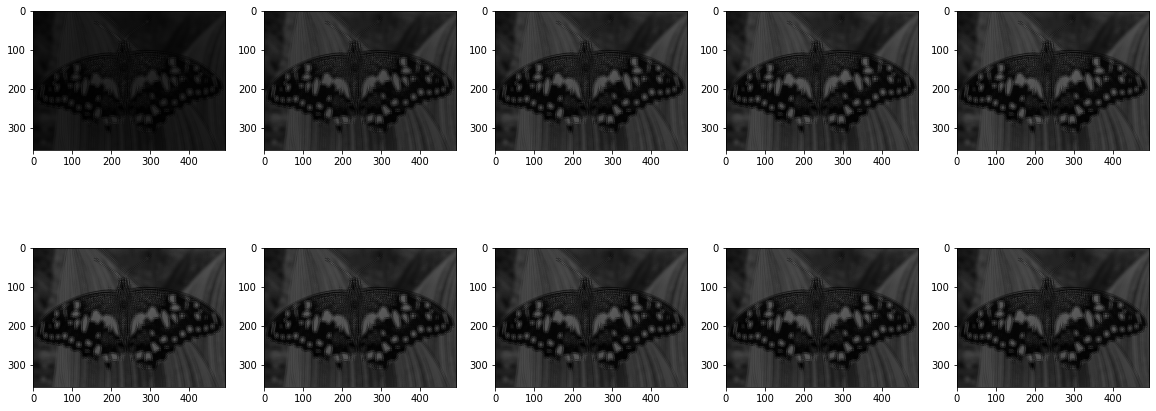

In [2]:
orgimg = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)

fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(20,8))
#Generating the Gaussian Kernel
kernel_dim = 5 # dimension of the kernel
for sigma in range(1,11,1):
    #sigma = 2 # standard deviation
    gaussian = cv.getGaussianKernel(kernel_dim, sigma)
    LoG = sigma**2*cv.Laplacian(gaussian,cv.CV_64F)
    #print(gaussian); print(LoG)
    out = cv.sepFilter2D(orgimg, -1,LoG ,LoG ) #Gaussian smoothing
    plt.subplot(2,5,sigma)
    plt.imshow(out, cmap='gray', vmin = 0, vmax = 255)